Importing necessary libraries

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


Reading the file


In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

Checking sample data

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
76,15746737,Male,18,52000,0
300,15736397,Female,58,38000,1
102,15584545,Female,32,86000,0
149,15767871,Male,20,74000,0
164,15697574,Female,33,69000,0


We can say that purchased is our target variable

Introduction of data

In [4]:
# Brief Introduction of Data
print("--------------- Dataset Shape---------------")
display(df.shape)
print("---------------Describing Variables---------------")
display(df.describe(include="all"))
print("---------------Feature Information---------------")
display(df.info())
print("---------------Duplicates---------------")
display(df.duplicated().sum())

--------------- Dataset Shape---------------


(400, 5)

---------------Describing Variables---------------


,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


---------------Feature Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


None

---------------Duplicates---------------


0

Dropping attributes that are not required

In [5]:
df.drop(columns='User ID',axis=1,inplace=True)
df.drop(columns='Gender',axis=1,inplace=True)

Visualizing the data with the help of Pandas Profiling

In [ ]:
###checking our data with profile report 
!pip install pandas-profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file ='output.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

BoxPlot to project the outliers

In [12]:
df1=df.iloc[:,0:1]

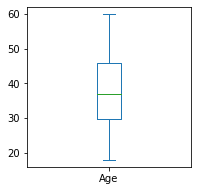

In [13]:
#boxplot to project outliers.
df1.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(10,10))
plt.show()

From above, we can see that there are no outliers

Splitting the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
y=df['Purchased']
X=df.drop(['Purchased'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


Standardizing the data using Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [ ]:
X_train

array([[-1.26804041, -1.38388204],
       [ 0.96148119,  1.98801329],
       [-0.98935021,  0.46914152],
       [ 1.79755179, -1.29274974],
       [ 0.12541059, -0.2295395 ],
       [ 0.31120406,  0.34763178],
       [ 0.40410079, -0.13840719],
       [ 2.07624199, -0.80671077],
       [-0.24617634, -0.7459559 ],
       [-1.82542081,  0.52989639],
       [ 1.98334525, -0.80671077],
       [ 1.89044852, -0.65482359],
       [ 0.77568772,  0.16536716],
       [ 2.07624199,  0.43876408],
       [-1.73252407, -1.50539179],
       [ 1.05437792,  0.6210287 ],
       [ 0.96148119,  0.83367074],
       [-0.24617634, -0.89784308],
       [ 0.31120406, -1.17124   ],
       [-1.08224694,  0.10461229],
       [-1.54673061,  0.59065126],
       [ 0.49699752,  1.31970971],
       [-0.80355674, -0.2295395 ],
       [-0.33907308, -1.32312717],
       [-1.63962734,  0.52989639],
       [ 2.07624199, -0.68520103],
       [-0.24617634,  0.1957446 ],
       [-1.26804041, -0.41180411],
       [-0.61776328,

1st method to find out the value of k


In [17]:
#1st method to find out the value of k
np.sqrt(X_train.shape[0])

17.88854381999832

In [18]:
K=17

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [20]:
#knn.fit(X_train,y_train)

In [21]:
y_pred=knn.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(80,)
(80,)


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8875

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[44,  6],
       [ 3, 27]])

Therefore, using this method we determine that k=17 is appropriate value and get an accuracy of 90% 


2nd method to find out the value of k


In [24]:
#2nd method to find out the value of k
accuracy = []
for i in range(1,26):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [25]:
len(accuracy)

25

Plot for k values upto 25

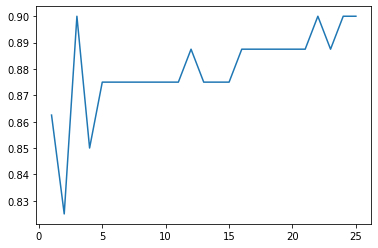

In [26]:

plt.plot(range(1,26),accuracy)

Using this we determine at what valuues of k our model performs the best.

In [27]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred=knn.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.9

With the help of above plot we took the k=3 and got an accuracy of 90%

To predict whether the person purchases or not

In [ ]:
def predict_output():
  age=int(input("enter the age "))
  salary=int(input("enter the salary "))
  X_new=np.array([[age],[salary]]).reshape(1,2)
  X_new=SC.transform(X_new)

  if knn.predict(X_new)[0]==0:
    return "will not purchase"
  else:
    return "will purchase"

  return np.array([[age],[salary]])
  

In [ ]:
predict_output()

enter the age 45
enter the salary 160000


'will purchase'